Checking that the rotation angle files will work.

In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
import scipy.interpolate as interp
import os

%matplotlib inline

# Functions

In [2]:
def rotate_velocity(xv, yv, theta):
    """Rotate velocity vector (xv, yv) to new coordinate system.
    theta is the counterclockise angle measured from the x-axis of new coordinate system 
    and the x-axis of the (xv, yv) coordinate system
    If theta represents the angle between x grid lines and East than the result 
    is zonal (U) and meridional (V) velocities
    returns U,V - velocity along x and y axis in new coordinate system"""
    theta_rad = np.radians(theta)
    U = xv*np.cos(theta_rad) - yv*np.sin(theta_rad)
    V = xv*np.sin(theta_rad) + yv*np.cos(theta_rad)
    return U, V

In [3]:
def load_rotated_velocities(ufile, vfile, anglefile,
                            varu='vozocrtx', varv='vomecrty', 
                            varlon='nav_lon',varlat='nav_lat'):
    """Assuming u/v are already unstaggered"""
    f = nc.Dataset(ufile)
    xv = f.variables[varu][:]
    f.close()
    
    f = nc.Dataset(vfile)
    yv = f.variables[varv][:]
    f.close()
    
    f = nc.Dataset(anglefile)
    theta = f.variables['alpha'][:]
    lon = f.variables['nav_lon'][:]
    lat = f.variables['nav_lat'][:]
    f.close()
    
    u, v = rotate_velocity(xv,yv,theta)
    
    return u,v,lon, lat

# SalishSea

In [4]:
date='20170401'
basedir = '/data/hdd/salishsea/model_Agrid/'
ufile=os.path.join(basedir, date,'SalishSea_1h_{}_{}_grid_U_Agrid.nc'.format(date,date))
vfile=os.path.join(basedir, date,'SalishSea_1h_{}_{}_grid_V_Agrid.nc'.format(date,date))
anglefile = '/data/hdd/salishsea/grid/grid_angle_201702.nc'

u,v,lon,lat = load_rotated_velocities(ufile,vfile, anglefile)

f = nc.Dataset('/data/hdd/salishsea/grid/bathymetry_201702.nc')
bathy = f.variables['Bathymetry'][:]
f.close()

f = nc.Dataset('/data/hdd/salishsea/grid/mesh_mask201702.nc')
tmask = f.variables['tmask'][:]
f.close()

u = np.ma.array(u, mask=np.ones(u.shape) - tmask)
v = np.ma.array(v, mask=np.ones(v.shape) - tmask)

### Plotting
* Skip basemap for now -> issues with vector rotation with an irregular grid (ie need to interpolate...)

(48, 49)

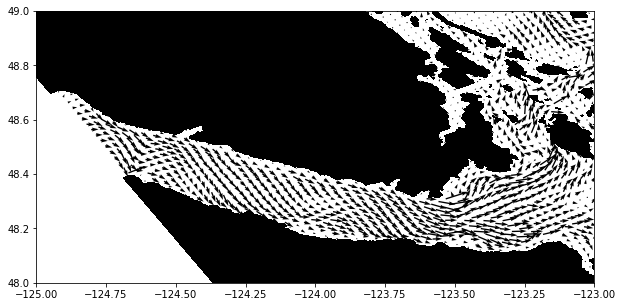

In [5]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
st=5
t=0
d=0
ax.quiver(lon[::st, ::st], lat[::st, ::st], u[t,d,::st,::st,], v[t,d,::st,::st],scale=50)
ax.contourf(lon, lat, bathy.data, [-0.1,0.1], colors='k')
ax.set_xlim([-125,-123])
ax.set_ylim([48,49])

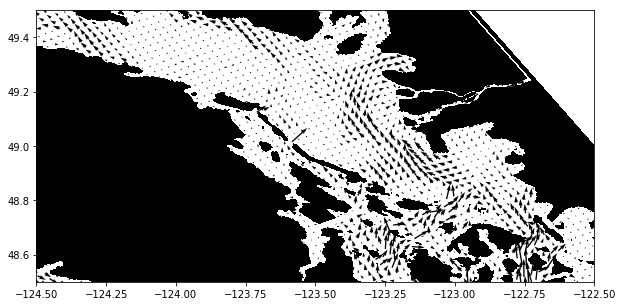

In [6]:
ax.set_xlim([-124.5,-122.5])
ax.set_ylim([48.5,49.5])
fig

Expecting flood tide base on currents. Check ssh at near Point Atkinson

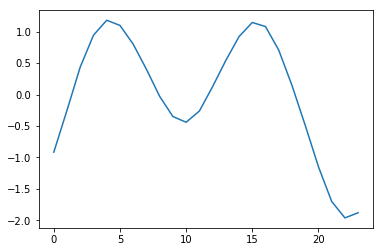

In [7]:
tfile = os.path.join(basedir, date,'SalishSea_1h_{}_{}_grid_T.nc'.format(date,date) )
f = nc.Dataset(tfile)
ssh = f.variables['sossheig'][:]
j,i=480,330
plt.plot(ssh[:,j,i])

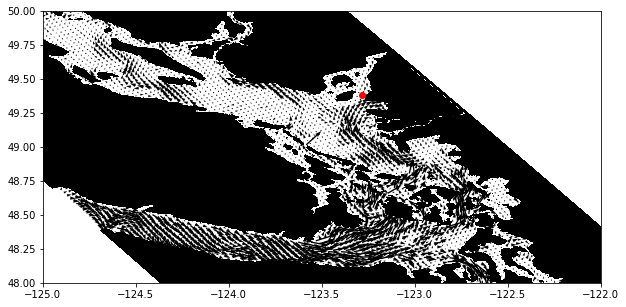

In [8]:
ax.set_xlim([-125,-122])
ax.set_ylim([48,50])
ax.plot(lon[j,i],lat[j,i],'ro')
fig

Water level rising at Point Atkinson -> flood tide